In [2]:
import numpy as np
import matplotlib.pyplot as plt
import scipy as sp


# Basic 

In [3]:
from scipy.optimize import minimize

minimize f(x) = (x-3)^2

In [4]:
def f(x):
    return (x-3)**2
res = minimize(f,2)

In [5]:
res

      fun: 5.551437397369767e-17
 hess_inv: array([[0.5]])
      jac: array([-4.3254289e-13])
  message: 'Optimization terminated successfully.'
     nfev: 6
      nit: 2
     njev: 3
   status: 0
  success: True
        x: array([2.99999999])

# interpolation

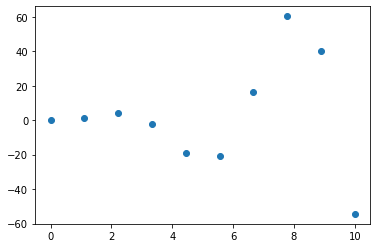

In [6]:
x= np.linspace(0,10,10)
y =x**2*np.sin(x)
plt.scatter(x,y)



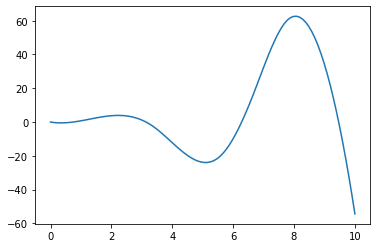

In [7]:
from scipy.interpolate import interp1d
f= interp1d(x,y,kind='cubic')
x_dense= np.linspace(0,10,100)
y_dense= f(x_dense)
plt.plot(x_dense,y_dense)



# curve fitting

In [8]:
x_data = np.linspace(0,10,10)
y_data = 3*x_data**2+ 2

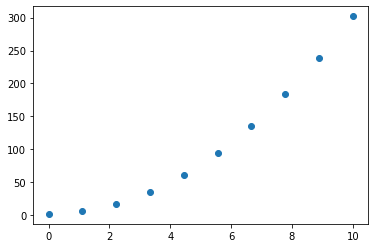

In [9]:
plt.scatter(x_data,y_data)

In [10]:
from scipy.optimize import curve_fit
def func(x,a,b):
    return a*x**2+b
popt, pcov = curve_fit(func, x_data, y_data, p0=(1,1))
popt

array([3., 2.])

# Diffrentation

In [11]:
from scipy.misc import derivative
def f(x):
    return x**2 * np.sin(2*x) *np.exp(-x)
x= np.linspace(0,1,100)

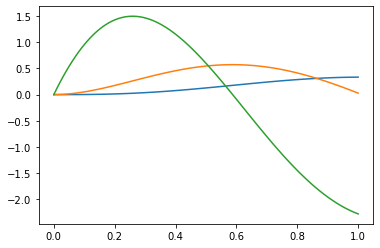

In [19]:
plt.plot(x, f(x))
#derivative(f,x, dx=1e-6) drevetives of f to x in each 1x10^-6
plt.plot(x, derivative(f,x, dx=1e-6)) #1st derevatives graph
plt.plot(x, derivative(f,x, dx=1e-6,n=2)) #2nd derevatives
#plt.plot(x, derivative(f,x, dx=1e-6,n=3)) #3rd derevatives


# intergration

In [28]:
from scipy.integrate import quad #quad is function
integrand = lambda x: x** np.sin(x)* np.exp(-x) #def function
integral, integral_error = quad(integrand,0,1) #0 and 1 are bound 

In [31]:
integral_error

3.263128656172398e-11

double integral

In [36]:
from scipy.integrate import dblquad  #dblquad is double integral function
integrand1= lambda x,y: np.sin(x+y**2)
lwr_y= lambda x: -x   #creating bound for y intergral
upr_y= lambda x: x**2
integral, integral_error = dblquad(integrand1,0,1,lwr_y,upr_y)

In [37]:
integral

0.315802507240474

In [38]:
integral_error

1.5634600713498928e-14

# Differtial Equations

In [41]:
from scipy.integrate import odeint

all information about differential equation

In [43]:
def dvdt(v,t):
    return 3*v**2-5
v0= 0

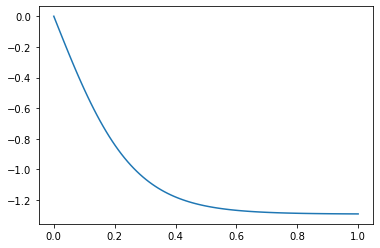

In [48]:
t= np.linspace(0,1,100)
sol= odeint(dvdt, v0, t)
sol.T[0]
plt.plot(t, sol.T[0])  #kena buat T[0] utuk buat array(utk graph)

coupled first order ODEs

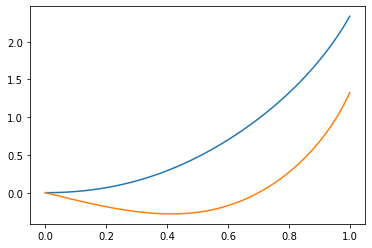

In [50]:
def dSdx(S,x):
    y1, y2= S
    return [y1+y2**2+3*x,
            3*y1+y2**3-np.cos(x)]
y1_0=0
y2_0=0
S_0= (y1_0,y2_0)

x= np.linspace(0,1,100)
sol= odeint(dSdx,S_0,x) # differntial, initial value of S and x

y1=sol.T[0]
y2=sol.T[1]
plt.plot(x,y1)
plt.plot(x,y2)

            

# second order differential equation

any second order ODE can be turned to two coupled first order ODEs


In [51]:
def dSdt(S,t):
    theta, omega= S
    return [omega, np.sin(theta)]
theta0= np.pi/4
omega0= 0
S0= (theta0, omega0)

In [52]:
t= np.linspace(0,20,100)
sol= odeint(dSdt,S0,t)
theta,omega= sol.T

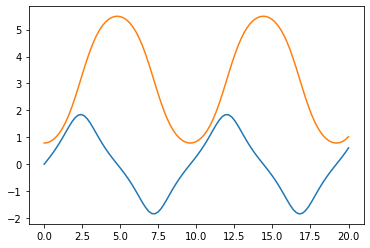

In [60]:
plt.plot(t,omega)
plt.plot(t,theta)